In [1]:
## Importing 

import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

f = load_boston()

# Create the dataframe

column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Visualization 

Using Box Plot

C:\Users\Munna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

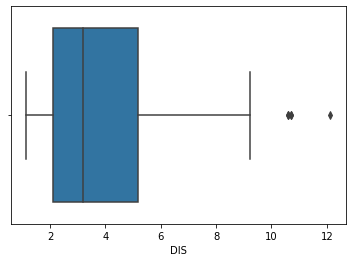

In [8]:
import seaborn as sns

sns.boxplot(df_boston['DIS'])

In [9]:
## Position of the Outliers
import numpy as np

print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


In [10]:
df_boston.shape

(506, 13)

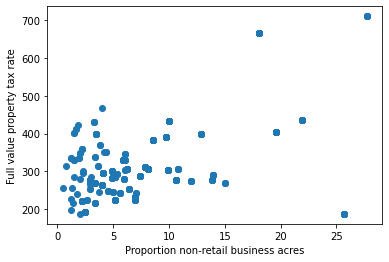

In [14]:
## Using Scatter plot

scatter = plt.scatter(df_boston["INDUS"],df_boston["TAX"])
plt.xlabel("Proportion non-retail business acres")
plt.ylabel("Full value property tax rate")
plt.show()


In [16]:
##Position of the Outliers

print(np.where((df_boston['INDUS']>20) & (df_boston["TAX"]>600)))

(array([488, 489, 490, 491, 492], dtype=int64),)


## Z - Score
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.


In [19]:
# Z score
from scipy import stats

import numpy as np

z = np.abs(stats.zscore(df_boston["DIS"]))
print(z)

0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: DIS, Length: 506, dtype: float64


The above output is just a snapshot of part of the data; the actual length of the list(z) is 506 that is the number of rows. It prints the z-score values of each data item of the column

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [20]:
thresold  = 3

# Position of the Outliers

print(np.where(z>3))

(array([351, 352, 353, 354, 355], dtype=int64),)


## 3. IQR (Inter Quartile Range)

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [22]:
Q1 = np.percentile(df_boston['DIS'],25,interpolation='midpoint')

Q3 = np.percentile(df_boston['DIS'],75,interpolation='midpoint')

IQR = Q3-Q1
print(IQR)

3.0646000000000004


In [24]:
higher_fence = Q3+1.5*IQR
lower_fence = Q1-1.5*IQR

print(higher_fence)
print(lower_fence)

9.76185
-2.496550000000001


In [31]:
df = (df_boston["DIS"]>=9).values
pd.DataFrame(df)

,0
0,False
1,False
2,False
3,False
4,False
...,...
501,False
502,False
503,False
504,False


In [35]:
# Above Upper bound
upper = df_boston['DIS']>= (higher_fence)

print("Upper bound:",upper)
print(np.where(upper))

#Below lower bound
lower = df_boston['DIS']<=(lower_fence)
print("Lower bound:",lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


## Removing the outliers
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used

dataframe.drop( row_index, inplace = True)


The above code can be used to drop a row from the dataset given the row_indexes to be dropped. Inplace =True is used to tell python to make the required change in the original dataset. row_index can be only one value or list of values or NumPy array but it must be one dimensional.

In [42]:
## Detecting the outliers using IQR and removing them

#Importing

import sklearn
from sklearn.datasets import load_boston
import pandas as pd

# Load the dataset

bos_hou = load_boston()

#Create the dataframe

column_names = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_names
df_boston.head()


"""Detecting"""


# IQR

Q1 = np.percentile(df_boston['DIS'],25,interpolation='midpoint')

Q3 = np.percentile(df_boston['DIS'],75,interpolation='midpoint')

IQR = Q3 - Q1

print("Old Shape:",df_boston.shape)

#Upper bound

upper = np.where(df_boston["DIS"]>=(Q3+1.5*IQR))
print(upper)
# Lower bound

lower = np.where(df_boston["DIS"]<= (Q1-1.5*IQR))
print(lower)
""" Removing the Outliers"""

df_boston.drop(upper[0],inplace=True)
df_boston.drop(lower[0],inplace=True)

print("New shape:",df_boston.shape)

Old Shape: (506, 13)
(array([351, 352, 353, 354, 355], dtype=int64),)
(array([], dtype=int64),)
New shape: (501, 13)


In [56]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()

column_names = boston.feature_names

df_boston = pd.DataFrame(boston.data)

df_boston.columns = column_names

df_boston.head()
print("Old shape:",df_boston.shape)
# Detecting Outliers

Q1 = np.percentile(df_boston['CRIM'],25,interpolation = 'midpoint')

Q3 = np.percentile(df_boston['CRIM'],75,interpolation = 'midpoint')

IQR  = Q3-Q1

upper = np.where(df_boston['CRIM'] >=  Q3+1.5*IQR)
print(upper)

lower = np.where(df_boston['CRIM'] <= Q1-1.5*IQR)
print(lower)

## detecting rows of upper and lower outliers
print(pd.DataFrame(upper).shape)
print(pd.DataFrame(lower).shape)

## Deleting Outliers

df_boston.drop(upper[0],inplace=True)
df_boston.drop(upper[0],inplace = True)

print("New shape:",df_boston.shape)

Old shape: (506, 13)
(array([367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384,
       385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404,
       405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438,
       439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478,
       479], dtype=int64),)
(array([], dtype=int64),)
(1, 66)
(1, 0)


KeyError: '[367 371 373 374 375 376 377 378 379 380 381 382 384 385 386 387 388 392\n 394 398 399 400 401 402 403 404 405 406 407 409 410 411 412 413 414 415\n 416 417 418 419 420 422 425 426 427 429 431 434 435 436 437 438 439 440\n 441 443 444 445 447 448 454 468 469 477 478 479] not found in axis'